# Introduzione <a id="intro"></a>

Il presente progetto è stato sviluppato nell'ambito del corso di Fondamenti di Analisi dei Dati. L'obiettivo principale del progetto è applicare le tecniche e i metodi appresi durante il corso per analizzare un dataset reale, estrapolare informazioni significative, generare intuizioni utili relative alla classificazione. L'analisi si concentrerà su vari aspetti dei dati, tra cui la pulizia e la preparazione dei dati, l'analisi esplorativa...

Il dataset assegnato per questa analisi è l'Internet Advertisement dataset, un insieme di dati che rappresenta un insieme di possibili annunci pubblicitari su pagine Internet. Il compito principale associato a questo dataset è prevedere se un'immagine è un annuncio pubblicitario ("ad") o meno ("nonad").

## Indice:
* [Descrizione del Dataset](#descr-dataset)
* [Caricamento dei dati](#caricamento-dati)
    * [Acquisizione del Dataset](#acquisizione-dataset)
* [Pre-processing dei dati](#pre-processing)
    * [Gestione valori mancanti](#valori-mancanti)
* [Analisi dei dati ](#analisi-dati)
    * [Statistiche Descrittive](#statistiche-descrittive)
    * [Distribuzione dei dati](#distribuzione-dati)
    * [Outliers](#outliers)
* [Bilanciamento del dataset](#bilanciamento-dataset)
* [Riduzione di dimensionalità](#riduzione-dimensionalità)


# Descrizione del Dataset <a id="descr-dataset"></a>

Internet Advertisement Dataset è stato generato tra aprile e luglio 1998. È composto da 3279 istanze, di cui 2821 sono classificate come "nonad" e 458 come "ad". Ogni istanza è descritta da 1558 attributi, di cui 3 continui e il resto binari. Gli attributi continui possono essere mancanti nel 28% delle istanze secondo quanto segnalato nella documentazione. Di seguito si propone uno schema della sua struttura:
* Nome del Dataset: Internet Advertisement Dataset
* Origine: Creato da Nicholas Kushmerick tra aprile e luglio 1998.
* Numero di Istanze: 3279 istanze, suddivise in 2821 "nonad" e 458 "ad".
* Numero di Attributi: 1558 attributi, di cui 3 continui e il resto binari costituiti da variabily dummy, raggruppabili in "url", "origurl", "ancurl", "alt" e "caption".
* Valori Mancanti: Il 28% delle istanze manca di uno o più attributi continui.
* Descrizione degli Attributi: Gli attributi continui codificano la geometria dell'immagine (se disponibile); Gli attributi binari sono relativi alla presenza o meno di frasi che si verificano nell'URL dell'immagine, nell'URL e nel testo alternativo dell'immagine, nel testo dell'ancora e nelle parole che si verificano vicino al testo dell'ancora.

Si noti inoltre che non è presente una suddivisione in train e test set prestabilita dagli autori del dataset. Il dataset viene distribuito secondo la seguente struttura:
* ad.names, qui sono presenti tutti i nomi dei 1558 attributi presenti;
* ad.data, qui sono presenti tutti i 3279 records del dataset;
* ad.DOCUMENTATION: documentazione distribuita insieme al dataset.

# Caricamento dei Dati <a id="caricamento-dati"></a>

## Imports

In [1]:
# Install requirements
%pip install --user -qr ./requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from statsmodels.formula.api import ols
from sklearn.metrics import mean_absolute_error
from statsmodels.formula.api import logit
from sklearn.metrics import log_loss


## Acquisizione del Dataset <a id="acquisizione-dataset"></a>

Di seguito si procede ad acquisire il dataset. Si utilizza l'encoding ISO-8859-1 a causa di alcuni caratteri non standard nel file.

In [3]:
with open('ad.names', encoding='ISO-8859-1') as fp:
    cols = []
    for line in fp:
        line = line.strip()
        if line.endswith(': continuous.') or line.endswith(': 0,1.'):
            colname = line.split(':')[0]
            cols.append(colname)
    cols.append('Class')

In [4]:
# Viene caricato il dataset utilizzando i nomi delle colonne estratte dal file 'ad.names'
options = {
    'header': None, # il file non ha riga di intestazione
    'names': cols, 
    'skipinitialspace': True, # riumuove eventuali spazi bianchi iniziali
    'low_memory': False}
df = pd.read_csv('ad.data', **options)

In [5]:
# Stampa righe del dataset per osservare la struttura dati
df

height width  aratio local  url*images+buttons  url*likesbooks.com  \
0       125   125     1.0     1                   0                   0   
1        57   468  8.2105     1                   0                   0   
2        33   230  6.9696     1                   0                   0   
3        60   468     7.8     1                   0                   0   
4        60   468     7.8     1                   0                   0   
...     ...   ...     ...   ...                 ...                 ...   
3274    170    94  0.5529     0                   0                   0   
3275    101   140  1.3861     1                   0                   0   
3276     23   120  5.2173     1                   0                   0   
3277      ?     ?       ?     1                   0                   0   
3278     40    40     1.0     1                   0                   0   

      url*www.slake.com  url*hydrogeologist  url*oso  url*media  ...  \
0                     0                   0        0          0  ...   
1                     0                   0        0          0  ...   
2                     0                   0        0          0  ...   
3                     0                   0        0          0  ...   
4                     0                   0        0          0  ...   
...                 ...                 ...      ...        ...  ...   
3274                  0                   0        0          0  ...   
3275                  0                   0        0          0  ...   
3276                  0                   0        0          0  ...   
3277                  0                   0        0          0  ...   
3278                  0                   0        0          0  ...   

      caption*home  caption*my  caption*your  caption*in  caption*bytes  \
0                0           0             0           0              0   
1                0           0             0           0              0   
2                0           0             0           0              0   
3                0           0             0           0              0   
4                0           0             0           0              0   
...            ...         ...           ...         ...            ...   
3274             0           0             0           0              0   
3275             0           0             0           0              0   
3276             0           0             0           0              0   
3277             0           0             0           0              0   
3278             0           0             0           0              0   

      caption*here  caption*click  caption*for  caption*you   Class  
0                0              0            0            0     ad.  
1                0              0            0            0     ad.  
2                0              0            0            0     ad.  
3                0              0            0            0     ad.  
4                0              0            0            0     ad.  
...            ...            ...          ...          ...     ...  
3274             0              0            0            0  nonad.  
3275             0              0            0            0  nonad.  
3276             0              0            0            0  nonad.  
3277             0              0            0            0  nonad.  
3278             0              0            0            0  nonad.  

[3279 rows x 1559 columns]

In [6]:
df.dtypes

height                object
width                 object
aratio                object
local                 object
url*images+buttons     int64
                       ...  
caption*here           int64
caption*click          int64
caption*for            int64
caption*you            int64
Class                 object
Length: 1559, dtype: object

I valori mancanti vengono indicati con '?' nel dataset, per cui per essere elaborati con pandas, vengono sostituiti con nan.

In [7]:
columns_with_question_mark = (df == "?").any()
columns_with_question_mark[columns_with_question_mark].index

Index(['height', 'width', 'aratio', 'local'], dtype='object')

In [8]:
df = df.replace('?', np.nan)

Viene impostato il tipo corretto per le feature che presentavano valori mancanti

In [9]:
df['height'] = df['height'].astype(float)
df['width'] = df['width'].astype(float)
df['aratio'] = df['aratio'].astype(float)
df['local'] = df['local'].astype(float)

# Pre-processing dei dati <a id="pre-processing"></a>

## Mappatura Classi

La variabile categorica Class è un object, ma è una variabile binaria, dunque si decide di cambiare il type da object ad int con:
* 0 = nonad.
* 1 = ad.

In [10]:
df['Class'] = df['Class'].map({'nonad.': 0, 'ad.': 1}).astype(int)

## Split train e test set

In [115]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

In [116]:
print(train_set.shape)
print(test_set.shape)

(2623, 765)
(656, 765)


## Gestione valori mancanti <a id="valori-mancanti"></a>

### Test Set

Per il test set, si procede all'eliminazione dei records con valori mancanti.

In [117]:
test_set.isna().sum()

height                184
width                 184
aratio                186
local                   3
url*images+buttons      0
                     ... 
caption*here            0
caption*click           0
caption*for             0
caption*you             0
Class                   0
Length: 765, dtype: int64

In [118]:
test_set.dropna(inplace=True)

In [119]:
test_set.isna().sum()

height                0
width                 0
aratio                0
local                 0
url*images+buttons    0
                     ..
caption*here          0
caption*click         0
caption*for           0
caption*you           0
Class                 0
Length: 765, dtype: int64

In [120]:
test_set['local'] = test_set['local'].astype(int)
test_set.shape

(467, 765)

### Train Set

Verifica dei valori mancanti come indicato dalla documentazione

In [121]:
train_set.isna().sum()

height                719
width                 717
aratio                724
local                  12
url*images+buttons      0
                     ... 
caption*here            0
caption*click           0
caption*for             0
caption*you             0
Class                   0
Length: 765, dtype: int64

In [122]:
columns_with_missing_values = train_set.isna().sum() > 0
columns_with_missing_values[columns_with_missing_values]

height    True
width     True
aratio    True
local     True
dtype: bool

Come ci si aspettava rispetto alla documentazione, il dataset presenta diversi dati mancanti, di seguito il totale dei record affetti:

In [123]:
missing_data_rows = (train_set.isna().sum(axis=1) > 0).sum()
print(missing_data_rows)
print(str(round(missing_data_rows * 100 / train_set.shape[0], 2)) + "%")

731
27.87%


#### Height, Width, Aratio

In [124]:
print(round(train_set.loc[1, 'width'] / train_set.loc[1, 'height'], 4), train_set.loc[1, 'aratio'])

1.0 1.0


Considerato che:
* I valori mancanti si concentrano nelle features `Height`, `Width`, `Arazio`;
* `arazio = width/height`

ci si occuperà di gestire i valori mancanti in height e width per poi ricavare arazio da essi.

Di seguito il numero di records con le features height, width, aratio con dati mancanti:

In [125]:
(train_set[['height', 'width', 'aratio']].isna().any(axis=1)).sum()

724

Metodi per la loro gestione:

* **Eliminazione diretta delle colonne**: Come si nota, le features principalmente affette sono quelle con dati continui relative alle immagini. Una soluzione potrebbe essere l'eliminazione di `height`, `width` e `aratio`.

* **Eliminazione records**: Eliminare direttamente le righe con dati mancanti. Soluzione indicata per poche righe con dati mancanti, in questo caso si andrebbero ad eliminare 910 records, ovvero 27.75% del totale.

* **Imputazione con la media o mediana**: avendo grossa parte dei valori mancanti, la media stimata potrebbe discostarsi di molto da quella effettiva;

* **Imputazione con moda**: viene mantenuta l'indipendenza delle osservazioni (le adv sono indipendenti per ogni record), non ha bisogno di ordinamenti, di contro si potrebbe sovrastimare la frequenza di caratteristiche comuni.

* **Imputazione KNN**: Le osservazioni sono considerate come punti nello spazio delle features e i valori mancanti sono stimati sulla base dei k vicini più prossimi.


Si è deciso di procedere con l'imputazione della moda per height e width e ricavare da essa aratio.

In [126]:
height_mode = train_set['height'].mode()[0]
width_mode = train_set['width'].mode()[0]

# Imputo i valori mancanti
train_set['height'].fillna(height_mode, inplace=True)
train_set['width'].fillna(width_mode, inplace=True)
train_set['aratio'].fillna(width_mode/height_mode, inplace=True)

#### Local

Di seguito i records con la feature local con dati mancanti:

In [127]:
(train_set[['local']].isna().any(axis=1)).sum()

12

Considerando che sono solo 15 i record con local indefinito, per cui lo 0.45% del totale, si procede all'eliminazione di questi records.

In [128]:
train_set = train_set.dropna(subset=['local'])
train_set['local'] = train_set['local'].astype(int)

Osservazione dati puliti

In [129]:
train_set.isna().sum()

height                0
width                 0
aratio                0
local                 0
url*images+buttons    0
                     ..
caption*here          0
caption*click         0
caption*for           0
caption*you           0
Class                 0
Length: 765, dtype: int64

# Analisi dei dati <a id="analisi-dati"></a>

Dalla prima revisione è emerso che visualizzare i dati è possibile facilmente solo per le variabili continue, meno per le variabili dummy. Provare a fare un conteggio degli 1 e zero per ogni variabile per capire quanto sparso è il dataset.

## Statistiche Descrittive <a id="statistiche-descrittive"></a>

In [130]:
pd.set_option('display.max_columns', None)
train_set.describe(include='all')

height        width       aratio        local  url*images+buttons  \
count  2611.000000  2611.000000  2611.000000  2611.000000         2611.000000   
mean     62.596323   239.290693     4.926099     0.771352            0.004213   
std      47.397886   177.487901     5.051376     0.420042            0.064783   
min       1.000000     1.000000     0.001500     0.000000            0.000000   
25%      32.000000    90.000000     1.296400     1.000000            0.000000   
50%      60.000000   150.000000     4.500000     1.000000            0.000000   
75%      60.000000   468.000000     7.800000     1.000000            0.000000   
max     640.000000   640.000000    60.000000     1.000000            1.000000   

         url*media  url*peace+images  url*tkaine+kats  url*ran+gifs  \
count  2611.000000       2611.000000      2611.000000   2611.000000   
mean      0.011107          0.003447         0.008809      0.003064   
std       0.104822          0.058621         0.093459      0.055279   
min       0.000000          0.000000         0.000000      0.000000   
25%       0.000000          0.000000         0.000000      0.000000   
50%       0.000000          0.000000         0.000000      0.000000   
75%       0.000000          0.000000         0.000000      0.000000   
max       1.000000          1.000000         1.000000      1.000000   

          url*cnet  url*tvgen.com  url*meadows+9196    url*blue   url*ad+gif  \
count  2611.000000     2611.00000       2611.000000  2611.00000  2611.000000   
mean      0.002681        0.00383          0.003447     0.00383     0.004213   
std       0.051718        0.06178          0.058621     0.06178     0.064783   
min       0.000000        0.00000          0.000000     0.00000     0.000000   
25%       0.000000        0.00000          0.000000     0.00000     0.000000   
50%       0.000000        0.00000          0.000000     0.00000     0.000000   
75%       0.000000        0.00000          0.000000     0.00000     0.000000   
max       1.000000        1.00000          1.000000     1.00000     1.000000   

        url*area51     url*pics  url*kandinsky  url*468x60   url*chat+b  \
count  2611.000000  2611.000000    2611.000000  2611.00000  2611.000000   
mean      0.013022     0.010724       0.009192     0.00383     0.004596   
std       0.113390     0.103019       0.095451     0.06178     0.067650   
min       0.000000     0.000000       0.000000     0.00000     0.000000   
25%       0.000000     0.000000       0.000000     0.00000     0.000000   
50%       0.000000     0.000000       0.000000     0.00000     0.000000   
75%       0.000000     0.000000       0.000000     0.00000     0.000000   
max       1.000000     1.000000       1.000000     1.00000     1.000000   

       url*home+gif  url*library     url*kats  url*tkaine+rings  url*any+time  \
count   2611.000000  2611.000000  2611.000000       2611.000000   2611.000000   
mean       0.003447     0.004213     0.009958          0.004979      0.002681   
std        0.058621     0.064783     0.099310          0.070399      0.051718   
min        0.000000     0.000000     0.000000          0.000000      0.000000   
25%        0.000000     0.000000     0.000000          0.000000      0.000000   
50%        0.000000     0.000000     0.000000          0.000000      0.000000   
75%        0.000000     0.000000     0.000000          0.000000      0.000000   
max        1.000000     1.000000     1.000000          1.000000      1.000000   

       url*home.netscape.com  url*catringn    url*logos     url*site  \
count            2611.000000   2611.000000  2611.000000  2611.000000   
mean                0.004979      0.004596     0.003064     0.002298   
std                 0.070399      0.067650     0.055279     0.047891   
min                 0.000000      0.000000     0.000000     0.000000   
25%                 0.000000      0.000000     0.000000     0.000000   
50%                 0.000000      0.000000     0.000000     0.000000   
75%        

Principali considerazioni:
* **height e width**: media width (241.20) è molto superiore media height (62.93), con std maggiore nella dimensione orizzontale rispetto a quella verticale.
* **aratio**: Il valore medio è 4.99, indicando che l'ampiezza è mediamente circa cinque volte l'altezza. Std elevata.
* **local**: Colonna binaria con un valore medio di 0.76, suggerendo che la maggior parte dei valori assunti è 1.
* La quasi totalità delle variabili categoriche binarie ha una media molto piccola in valore, suggerendo che la maggior parte dei valori assume 0, dunque il dataset risulta sparso.

 ## Distribuzione dei dati <a id="distribuzione-dati"></a>

### Distribuzione delle classi

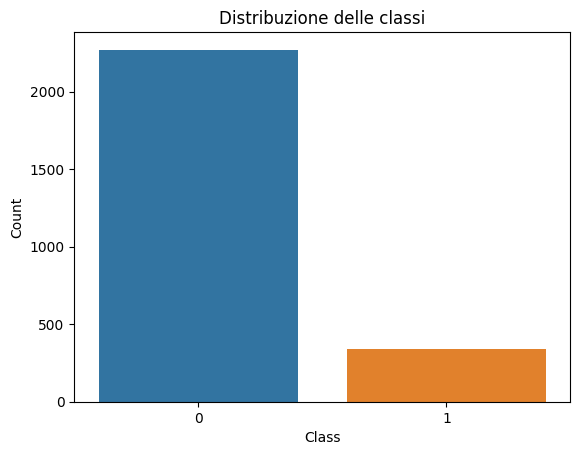

In [131]:
sns.countplot(data=train_set, x='Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribuzione delle classi')
plt.show()

Come si può apprezzare, il dataset risulta fortemente sbilanciato verso le Class "nonad.", ottenendo molti meno campioni per "ad.". In una sezione successiva si valuteranno tecniche di bilanciamento del dataset.

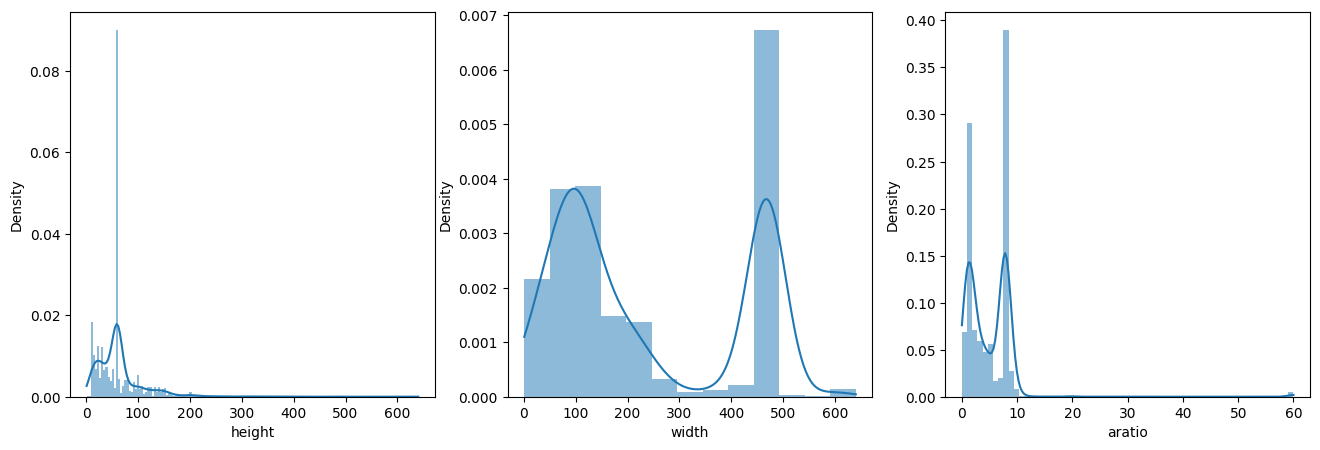

In [132]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(5)
fig.set_figwidth(16)

sns.histplot(train_set['height'], kde=True, stat="density", linewidth=0, ax=ax[0])
sns.histplot(train_set['width'], kde=True, stat="density", linewidth=0, ax=ax[1])
sns.histplot(train_set['aratio'], kde=True, stat="density", linewidth=0, ax=ax[2])

plt.show()

Si nota in parte una positive skew per le variabili continue

In [133]:
sns.heatmap(train_set.iloc[:,[0,1,2,1558]].corr(method="spearman"),annot=True)

IndexError: positional indexers are out-of-bounds

Si può notare una buona correlazione (Pearson) tra le variabili continue inerenti alle immagini.

In [134]:
# Raggruppa le variabili dummy in cluster
url_features = train_set[[col for col in train_set.columns if col.startswith('url*')]]
origurl_features = train_set.filter(like='origurl*')
ancurl_features = train_set.filter(like='ancurl*')
alt_features = train_set.filter(like='alt*')
caption_features = train_set.filter(like='caption*')

# Lista dei cluster e corrispondenti nomi dei cluster
clusters = [url_features, origurl_features, ancurl_features, alt_features, caption_features]
cluster_names = ['url', 'origurl', 'ancurl', 'alt', 'caption']

# Creazione della figura interattiva con sottoplot per ogni cluster
fig = make_subplots(rows=len(clusters), cols=1, subplot_titles=cluster_names)

# Aggiunta dei grafici a barre interattivi per ogni cluster
for i, cluster in enumerate(clusters):
    counts = cluster.sum()
    fig.add_trace(go.Bar(x=counts.index, y=counts.values, hovertemplate="Class: %{x}<br>Occorrenze di 1: %{y}"), row=i+1, col=1)

# Aggiunta dei titoli e impostazioni del layout
fig.update_layout(height=500*len(clusters), title_text="Numero di occorrenze di 1 per cluster di variabili dummy")
fig.update_xaxes(tickangle=45, tickfont=dict(size=8), showgrid=False)
fig.update_yaxes(title_text="Numero di occorrenze di 1")

fig.show()


Come si può osservare, il dataset risulta molto sparso, poche variabili superano il 4% dei records nel numero di occorrenze.

## Outliers <a id="outliers"></a>

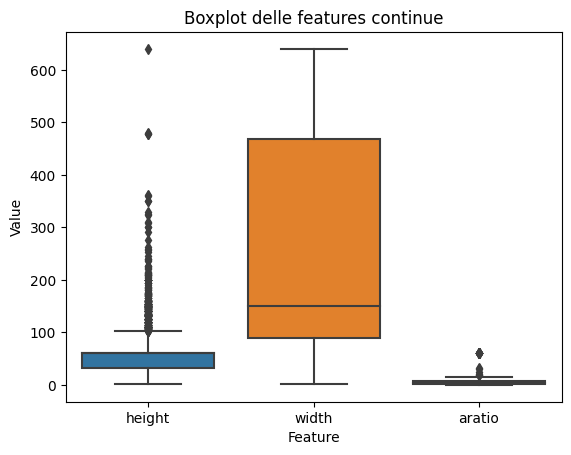

In [135]:
sns.boxplot(data=train_set.iloc[:, :3])
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Boxplot delle features continue')
plt.show()

Vengono valutati gli outlier per le variabili continue: la prima componente presenta possibili outlier che andrebbero indagati, comunque i valori rientrano nell'intorno di width.

# Riduzione di dimensionalità <a id="riduzione-dimensionalità"></a>

## Riduzione del numero dei valori qualitativi (macro-categorie)

In [136]:
def convert_dummy_to_categories(df):
    categories = ['url', 'origurl', 'ancurl', 'alt', 'caption']
    
    # Dizionario per conservare i mapping
    category_mappings = {}

    # Crea un nuovo dataframe per evitare di modificare l'originale
    new_df = df.copy()

    # Processa ogni macro-categoria
    for cat in categories:
        # Seleziona colonne relative alla macro-categoria
        cols = [col for col in new_df.columns if col.startswith(cat + '*')]
        
        # Crea il mapping
        unique_values = sorted(set(col.split('*')[-1] for col in cols))
        mapping = {value: i for i, value in enumerate(unique_values)}
        category_mappings[cat] = mapping
        
        # Converti le colonne dummy in una singola colonna
        new_df[cat] = new_df[cols].idxmax(axis=1).apply(lambda x: x.split('*')[-1]).map(mapping)
        
        # Rimuovi colonne dummy originali
        new_df = new_df.drop(columns=cols)
        
    # Lista delle colonne senza 'Class'
    columns_without_Class = [col for col in new_df.columns if col != 'Class']

    # Riorienta le colonne per mettere 'Class' alla fine
    new_df = new_df[columns_without_Class + ['Class']]
    return new_df, category_mappings

In [137]:
# Usa la funzione sul dataframe
train_set_categories, category_mappings = convert_dummy_to_categories(train_set)

# Mostra il dataframe finale
train_set_categories

height  width  aratio  local  url  origurl  ancurl  alt  caption  Class
0       60.0  468.0  7.8000      1   82       14      70   36        0      1
1      120.0  120.0  1.0000      1   76       14     131   51        0      0
2       90.0  128.0  1.4222      0   82       73     169  105        0      0
3       24.0  120.0  5.0000      0   80       14     276  105        0      0
4       77.0  108.0  1.4025      1  175      166     272   73        0      0
...      ...    ...     ...    ...  ...      ...     ...  ...      ...    ...
2618    78.0  101.0  1.2948      1   28      169     274  105        1      0
2619    44.0   38.0  0.8636      1   82       14     169  105        0      0
2620    31.0   88.0  2.8387      0  130       44     169  105        0      0
2621    16.0   16.0  1.0000      1  173       66     104  105        0      0
2622    64.0  144.0  2.2500      1   44       66     218   36        0      0

[2611 rows x 10 columns]

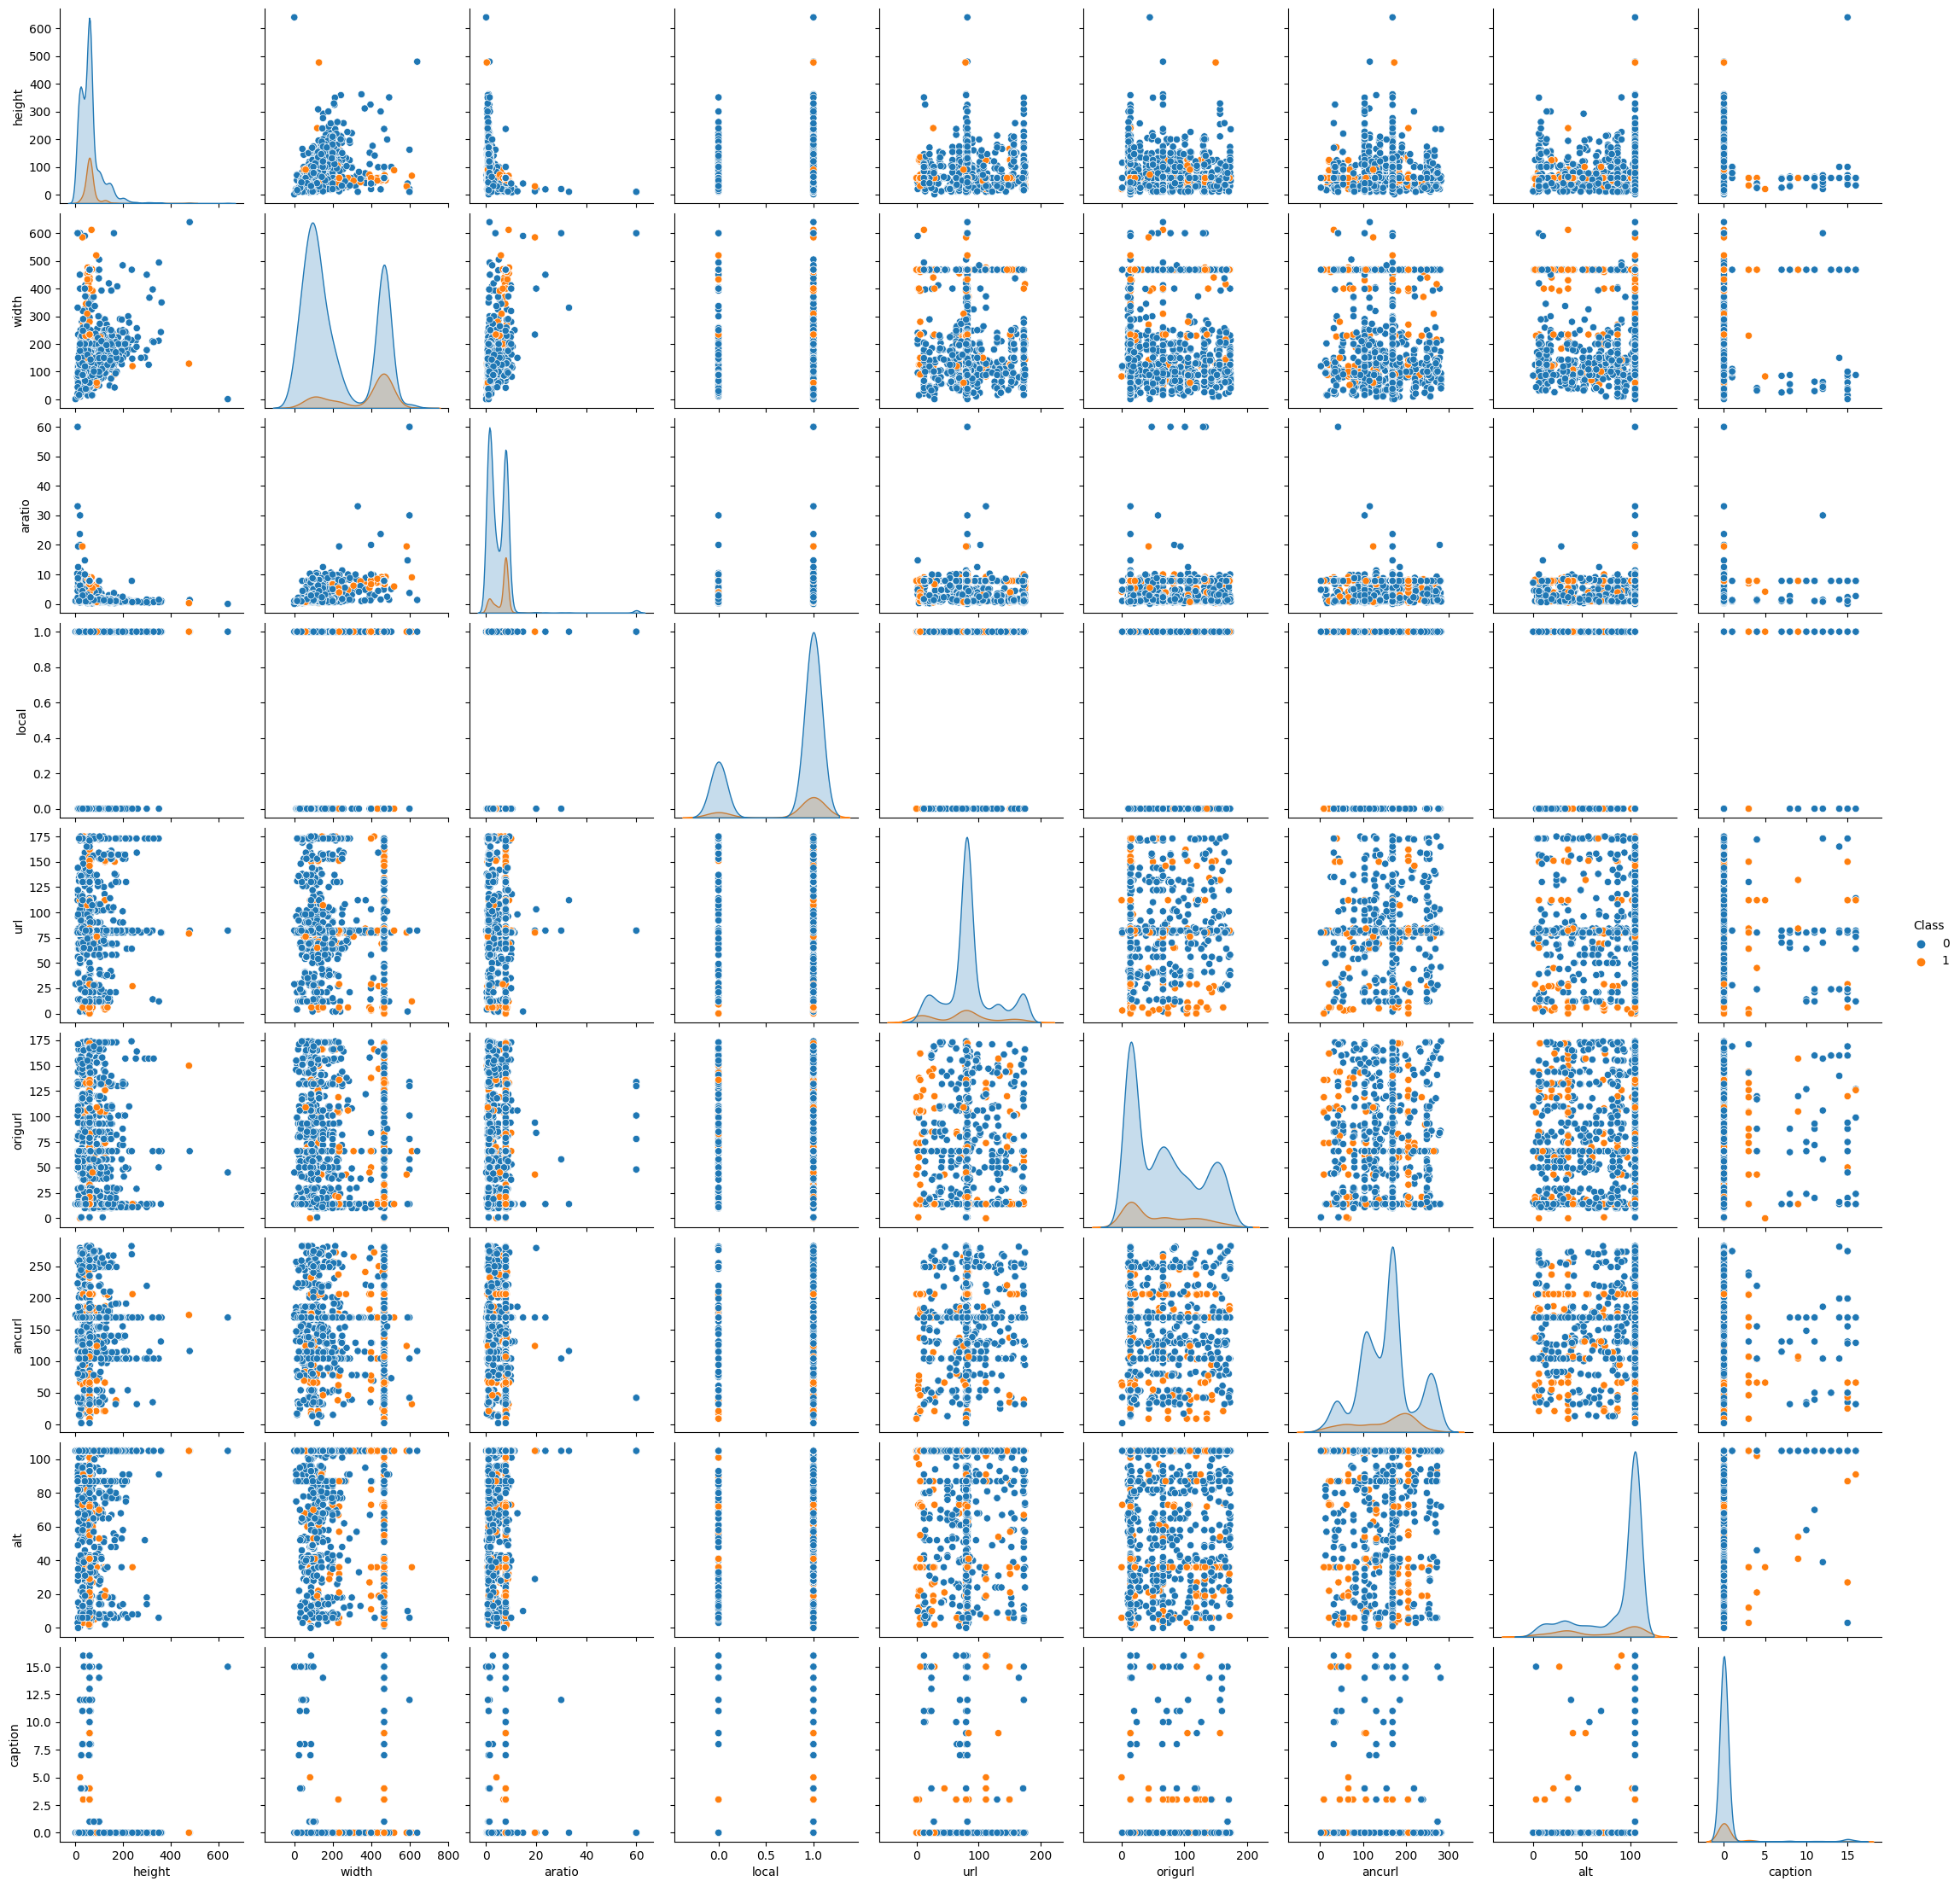

In [138]:
sns.pairplot(train_set_categories, hue='Class', diag_kind='kde')
plt.show()

In [139]:
# Usa la funzione sul dataframe
test_set_categories, category_mappings = convert_dummy_to_categories(test_set)

# Mostra il dataframe finale
test_set_categories

height  width  aratio  local  url  origurl  ancurl  alt  caption  Class
0      40.0  160.0  4.0000      1  173       66     104   31        0      0
1     145.0  242.0  1.6689      1   90       72     138  105        0      0
3     125.0  125.0  1.0000      0  151      105     206   36        0      1
4      38.0  198.0  5.2105      1   80       14     152  105        0      0
5      43.0  230.0  5.3488      1   80       21     237   19        0      1
..      ...    ...     ...    ...  ...      ...     ...  ...      ...    ...
647    60.0  468.0  7.8000      1   68       50     104  105        0      1
650    12.0  101.0  8.4166      1   80       81     104   31        0      0
651    60.0  468.0  7.8000      0    0       66     206   36        0      1
653    60.0   60.0  1.0000      1   80       14     129  105        0      0
654    60.0  468.0  7.8000      0    0       14       9   36        3      1

[467 rows x 10 columns]

## PCA

Si è scelto di valutare una riduzione delle features tramite PCA per effettuare un'analisi completa. Le variabili dummy sono raggruppabili in cluster come segue: url, origurl, ancurl, alt, caption.

Si definiscono le seguenti funzioni ausiliarie:

In [140]:
def show_pca_var_plot(pca, cluster_title):
    explained_variance = pca.explained_variance_ratio_
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5,
            align='center', label=cluster_title + ' individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    plt.show()

In [141]:
def apply_pca(train_df, test_df, n_components=0.70, show_plots=False):
    feature_groups = {
        "url": [col for col in train_df.columns if col.startswith('url*')],
        "origurl": [col for col in train_df.columns if 'origurl*' in col],
        "ancurl": [col for col in train_df.columns if 'ancurl*' in col],
        "alt": [col for col in train_df.columns if 'alt*' in col],
        "caption": [col for col in train_df.columns if 'caption*' in col]
    }

    # Apply PCA to each feature group
    pca_models = {}
    for group_name, features in feature_groups.items():
        pca = PCA(n_components=n_components)
        pca.fit(train_df[features])  # Fit PCA on training data
        pca_models[group_name] = pca  # Save the PCA model

    # Transform both training and test data using the fitted PCA models
    for df in [train_df, test_df]:
        pca_features = []
        for group_name, features in feature_groups.items():
            pca_result = pca_models[group_name].transform(df[features])
            if show_plots and df is train_df:
                show_pca_var_plot(pca_models[group_name], group_name)
            pca_features.append(pca_result)

        # Concatenate the PCA-transformed feature clusters back together
        pca_df = pd.DataFrame(
            np.concatenate([
                df[['height', 'width', 'aratio', 'local']].to_numpy(), 
                *pca_features,
                df[['Class']].to_numpy()
            ], axis=1)
        )

        # Add column names
        column_names = ['height', 'width', 'aratio', 'local']

        for (group, pca_result) in zip(feature_groups.keys(), pca_features):
            for i in range(pca_result.shape[1]):
                column_names.append(f"{group}_c{i}")

        column_names.append('Class')
        pca_df.columns = column_names
        pca_df['local'] = pca_df['local'].astype(int)
        pca_df['Class'] = pca_df['Class'].astype(int)

        if df is train_df:
            train_pca_df = pca_df
        else:
            test_pca_df = pca_df

    return train_pca_df, test_pca_df

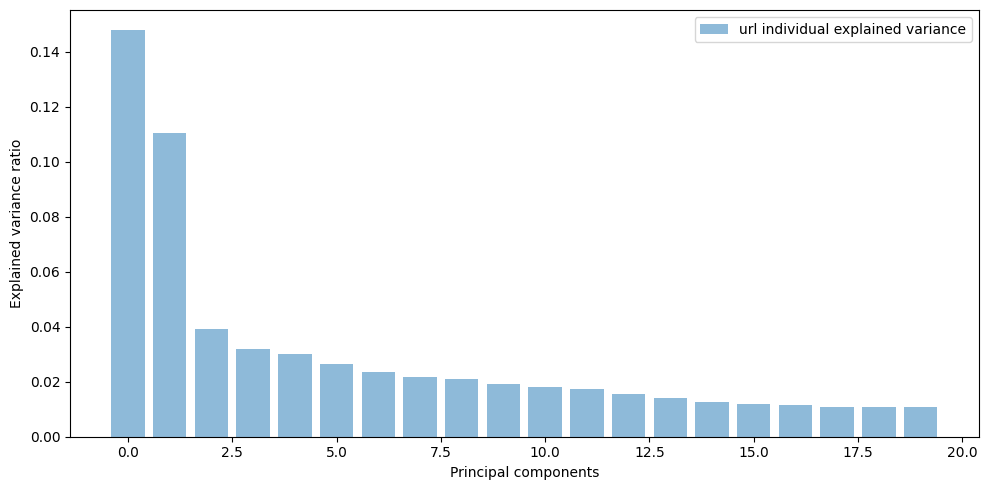

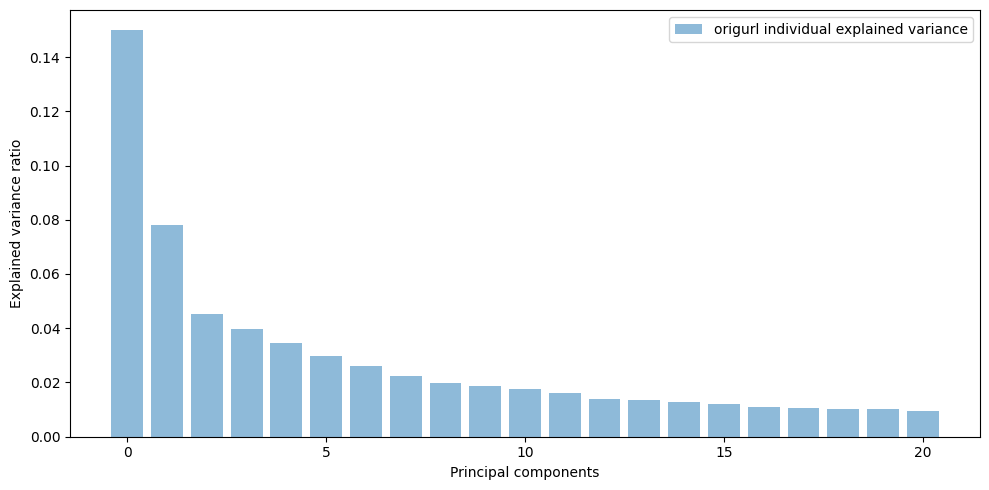

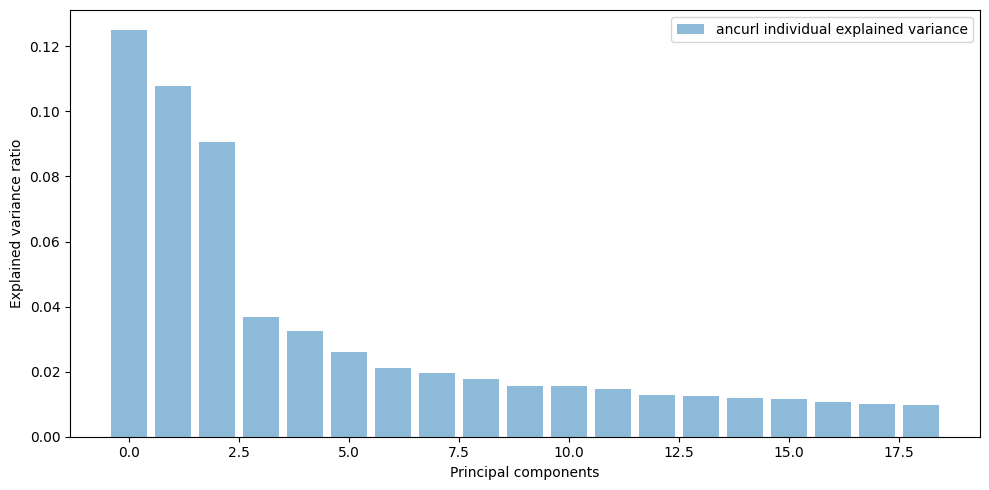

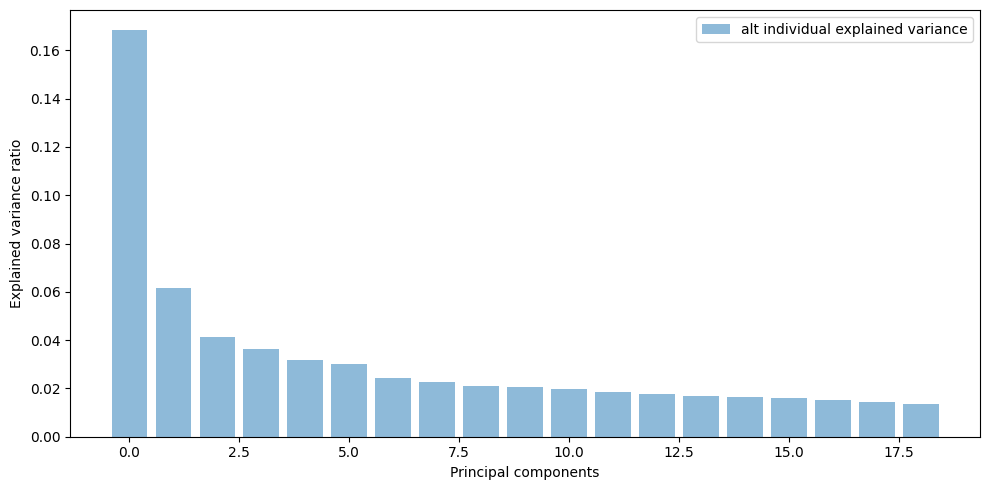

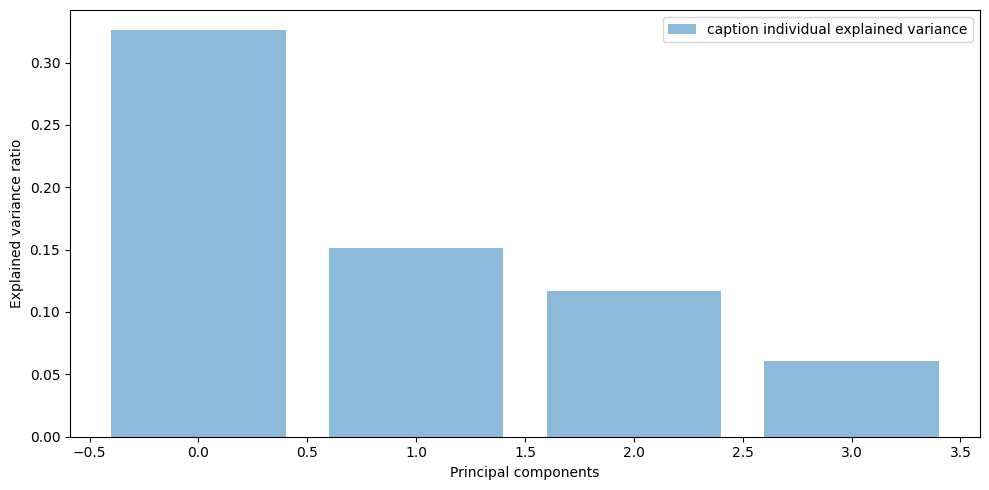

88


In [142]:
pca_train_set, pca_test_set = apply_pca(train_set, test_set, n_components=0.60, show_plots=True) # Keep 70% of variance
print(len(pca_train_set.columns))

Grafico a barre che mostra quanta varianza è spiegata da ciascuna componente principale.

<Axes: >

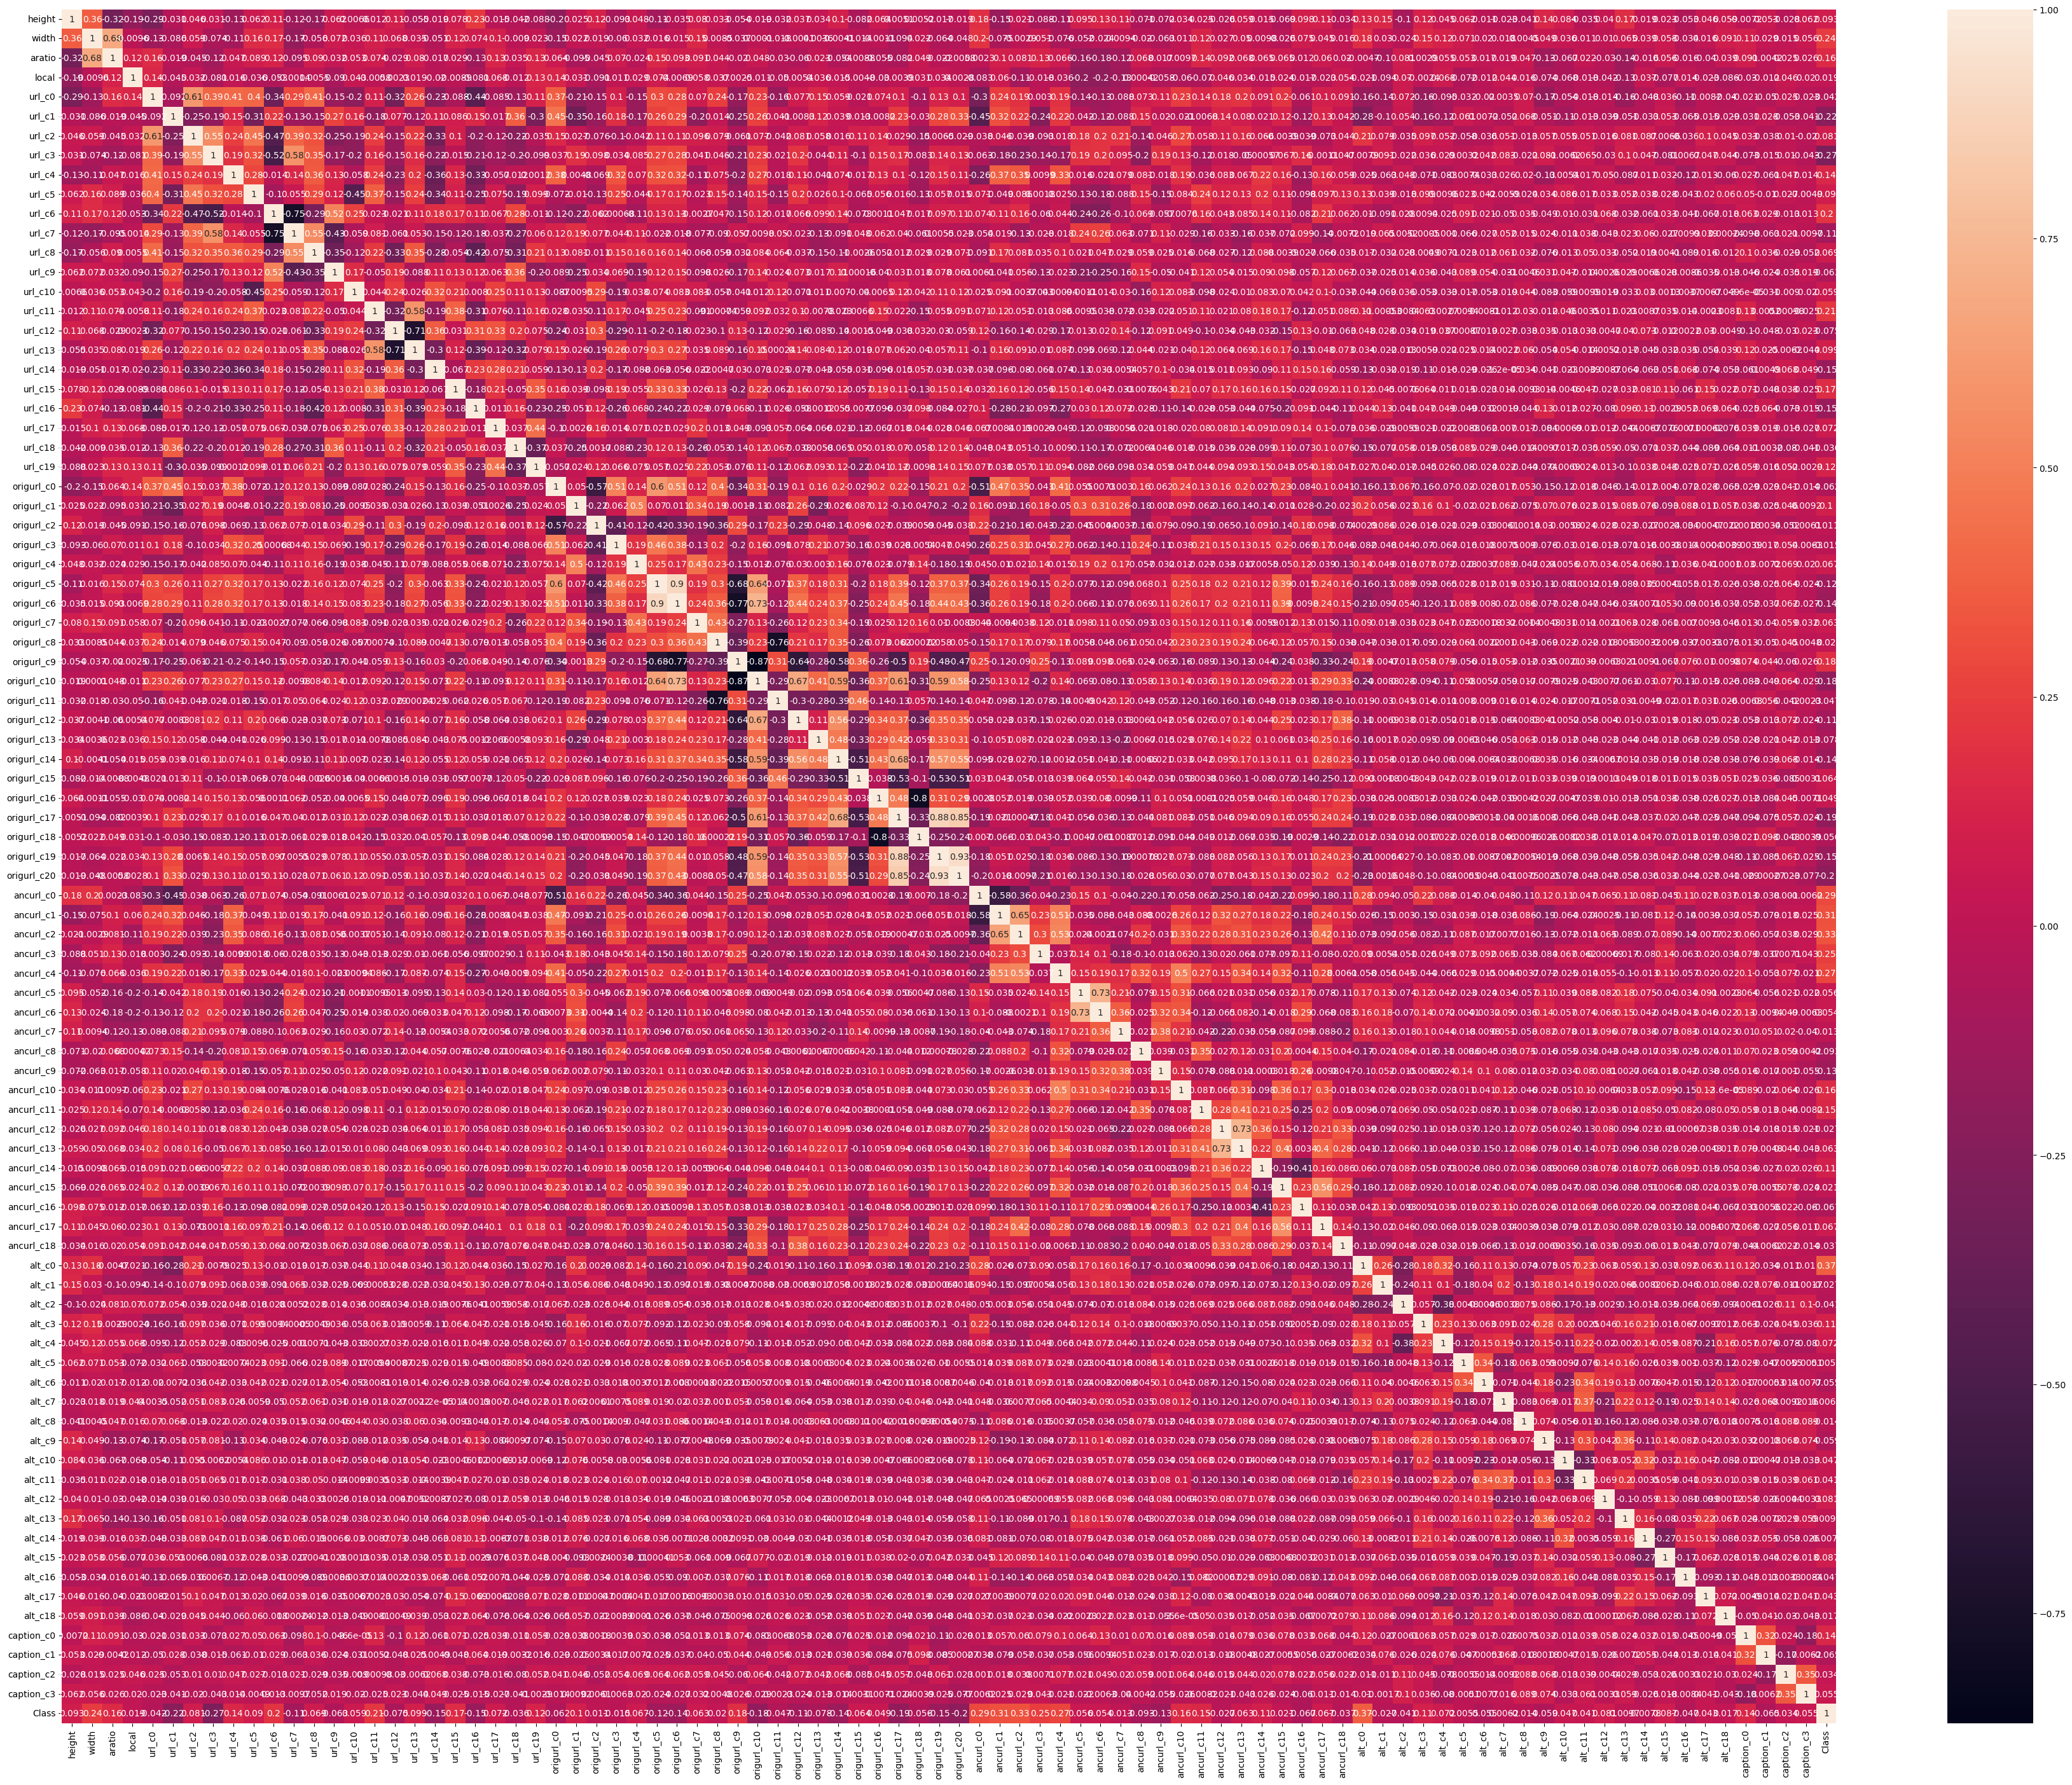

In [143]:
plt.figure(figsize=(45,35))
sns.heatmap(pca_train_set.corr(method="spearman"),annot=True)

# Regressione <a id="regressione"></a>

Nel prossimo capitolo, si esaminerà l'applicazione delle tecniche di regressione al dataset fornito. Si rende necessario utilizzare il dateset ottenuto tramite riduzione delle variabily dummi a variabili categoriche e quello ottenuto dall'analisi delle componenti principali (PCA), poiché il numero di variabili indipendenti nel dataset originale sarebbe eccessivo e richiederebbe tempi di calcolo proibitivi. Si verifica facilmente l'errore di 'maximum recursion depth exceeded'.

## Linear (probabilmente da levare)

Un esperimento interessante potrebbe essere provare a stimare una delle tre variabili continue ["height", "width", "aratio"] tramite regressione lineare. Viene di seguito definita una funzione per implementare la backward feature elimination. Si vuole valutare quali tra i due dataset ridotti performa meglio.

In [144]:
def backward_elimination(train_data, target_variable):
    feature_string = '+'.join([feature for feature in train_data.columns if feature != target_variable])
    formula = target_variable + " ~ " + feature_string
    regression_model = ols(formula, train_data).fit()
    
    eliminated_features = []
    x_vars = feature_string.split("+")
    while regression_model.pvalues.drop("Intercept").max() > 0.05:
        feature_to_remove = regression_model.pvalues.drop("Intercept").idxmax()
        eliminated_features.append(feature_to_remove)
        x_vars.remove(feature_to_remove)
        # print("feature_to_remove: ", feature_to_remove)
        # print("value: ", regression_model.pvalues.drop("Intercept").max())
        # print("new x_vars: ", x_vars)
        formula = target_variable + " ~ " + '+'.join(x_vars)
        regression_model = ols(formula, train_data).fit()
    
    return regression_model, eliminated_features

def perform_linear_regression(train_data, test_data, dependent_variable):
    regression_model, eliminated_features = backward_elimination(train_data, dependent_variable)
    print("Eliminated features: ", eliminated_features)

    # Calculate and print MAE
    print("Training MAE: ", np.sqrt(mean_absolute_error(train_data[dependent_variable], regression_model.predict(train_data))))
    print("Testing MAE: ", np.sqrt(mean_absolute_error(test_data[dependent_variable], regression_model.predict(test_data))))
    
    print(regression_model.summary())

In [145]:
perform_linear_regression(train_set_categories, test_set_categories, dependent_variable="aratio")

Eliminated features:  ['url', 'alt', 'local']
Training MAE:  1.236543158832811
Testing MAE:  1.4126685787497766
                            OLS Regression Results                            
Dep. Variable:                 aratio   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     372.9
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:14:12   Log-Likelihood:                -7123.7
No. Observations:                2611   AIC:                         1.426e+04
Df Residuals:                    2604   BIC:                         1.430e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [146]:
perform_linear_regression(pca_train_set, pca_test_set, dependent_variable="aratio")

Eliminated features:  ['caption_c1', 'alt_c18', 'url_c10', 'origurl_c18', 'origurl_c6', 'alt_c3', 'ancurl_c4', 'origurl_c12', 'alt_c7', 'url_c12', 'local', 'url_c5', 'ancurl_c16', 'origurl_c20', 'origurl_c17', 'origurl_c16', 'ancurl_c7', 'alt_c14', 'alt_c2', 'ancurl_c14', 'url_c3', 'alt_c13', 'origurl_c14', 'alt_c1', 'alt_c12', 'caption_c3', 'alt_c17', 'ancurl_c3', 'url_c14', 'url_c4', 'origurl_c3', 'caption_c2', 'url_c2', 'ancurl_c8', 'origurl_c13', 'alt_c4', 'ancurl_c13', 'alt_c11', 'alt_c16', 'alt_c15', 'origurl_c11', 'alt_c0', 'origurl_c4']
Training MAE:  1.1617555945304476
Testing MAE:  1.3760312719682721
                            OLS Regression Results                            
Dep. Variable:                 aratio   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     155.2
Date:                Sun, 16 Jul 2023   Prob (F-statistic):       

## Logistic

In [147]:
def backward_elimination_logistic(train_data, target_variable):
    feature_string = '+'.join([feature for feature in train_data.columns if feature != target_variable])
    formula = target_variable + " ~ " + feature_string
    regression_model = logit(formula, train_data).fit()

    eliminated_features = []
    x_vars = feature_string.split("+")

    while regression_model.pvalues.drop("Intercept").max() > 0.1:
        feature_to_remove = regression_model.pvalues.drop("Intercept").idxmax()
        eliminated_features.append(feature_to_remove)
        x_vars.remove(feature_to_remove)
        print("feature_to_remove: ", feature_to_remove)
        print("value: ", regression_model.pvalues.drop("Intercept").max())
        print("new x_vars: ", x_vars)
        print()
        formula = target_variable + " ~ " + '+'.join(x_vars)
        regression_model = logit(formula, train_data).fit()
    
    return regression_model, eliminated_features

def perform_logistic_regression(train_data, test_data, dependent_variable):
    regression_model, eliminated_features = backward_elimination_logistic(train_data, dependent_variable)
    print("Eliminated features: ", eliminated_features)

    # Calculate and print Log Loss
    print("Training Log Loss: ", log_loss(train_data[dependent_variable], regression_model.predict(train_data)))
    print("Testing Log Loss: ", log_loss(test_data[dependent_variable], regression_model.predict(test_data)))
    
    print(regression_model.summary())


In [148]:
import re
special_characters = set()

for col in cols:
    # Trova tutti i caratteri che non sono lettere
    found_characters = re.findall('[^a-zA-Z]', col)
    # Aggiungi i caratteri trovati al set
    special_characters.update(found_characters)

print("Caratteri speciali trovati:", special_characters)

Caratteri speciali trovati: {'.', '5', '3', '7', '+', '9', '2', '®', '6', '4', '0', '-', '1', '8', '*'}


In [149]:
perform_logistic_regression(train_set_categories, test_set_categories, dependent_variable="Class")

Optimization terminated successfully.
         Current function value: 0.323306
         Iterations 8
feature_to_remove:  ancurl
value:  0.8411505382596826
new x_vars:  ['height', 'width', 'aratio', 'local', 'url', 'origurl', 'alt', 'caption']

Optimization terminated successfully.
         Current function value: 0.323314
         Iterations 8
feature_to_remove:  caption
value:  0.8000852192664807
new x_vars:  ['height', 'width', 'aratio', 'local', 'url', 'origurl', 'alt']

Optimization terminated successfully.
         Current function value: 0.323326
         Iterations 8
feature_to_remove:  height
value:  0.2081365961837146
new x_vars:  ['width', 'aratio', 'local', 'url', 'origurl', 'alt']

Optimization terminated successfully.
         Current function value: 0.323666
         Iterations 7
feature_to_remove:  local
value:  0.16084033810367793
new x_vars:  ['width', 'aratio', 'url', 'origurl', 'alt']

Optimization terminated successfully.
         Current function value: 0.324051
 

In [150]:
def replace_special_chars(column_name):
    mapping = {
        '.': '_dot_',
        '+': '_plus_',
        '®': '_registered_',
        '-': '_minus_',
        '*': '_asterisk_'
    }
    for special_char, replacement in mapping.items():
        column_name = column_name.replace(special_char, replacement)
    return column_name

# Sostituzione dei caratteri speciali nei nomi delle colonne
train_data = train_set.copy()
train_data.columns = [replace_special_chars(col) for col in train_data.columns]

test_data = test_set.copy()
test_data.columns = [replace_special_chars(col) for col in test_data.columns]

perform_logistic_regression(train_data, train_data, dependent_variable="Class")

C:\Users\danil\AppData\Roaming\Python\Python311\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning:

overflow encountered in exp



         Current function value: inf
         Iterations: 35


C:\Users\danil\AppData\Roaming\Python\Python311\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning:

divide by zero encountered in log



LinAlgError: Singular matrix

In [ ]:
df_categories, categ = convert_dummy_to_categories(df)

In [ ]:
# Ottenere la matrice di correlazione
correlation_matrix = df.corr()

# Selezionare le coppie di variabili con correlazione > 0.5 o < -0.5
subset = correlation_matrix[(correlation_matrix >= 1) | (correlation_matrix <= -1)]

# Creare una lista di coppie di variabili
coppie_variabili = []
for colonna in subset.columns:
    coppie = subset.index[subset[colonna].notna()].tolist()
    for coppia in coppie:
        if coppia != colonna:
            coppie_variabili.append((coppia, colonna))

# Stampare le coppie di variabili
print(len(coppie_variabili))
for coppia in coppie_variabili:
    print(coppia)

5278
('url*www.likesbooks.com', 'url*likesbooks.com')
('origurl*likesbooks.com', 'url*likesbooks.com')
('origurl*www.likesbooks.com', 'url*likesbooks.com')
('url*slake.com', 'url*www.slake.com')
('origurl*slake.com', 'url*www.slake.com')
('origurl*www.slake.com', 'url*www.slake.com')
('ancurl*www.slake.com', 'url*www.slake.com')
('ancurl*slake.com', 'url*www.slake.com')
('url*hydrogeologist+imgs', 'url*hydrogeologist')
('url*www.ems.psu.edu', 'url*hydrogeologist')
('origurl*www.ems.psu.edu', 'url*hydrogeologist')
('origurl*hydrogeologist', 'url*hydrogeologist')
('ancurl*hydrogeologist', 'url*hydrogeologist')
('ancurl*psu.edu', 'url*hydrogeologist')
('ancurl*www.ems.psu.edu', 'url*hydrogeologist')
('url*images+oso', 'url*oso')
('url*website.ora.com', 'url*oso')
('url*ora.com', 'url*oso')
('origurl*ora.com', 'url*oso')
('origurl*website.ora.com', 'url*oso')
('url*advertising+blipverts', 'url*blipverts')
('url*wired.com', 'url*blipverts')
('url*static.wired.com', 'url*blipverts')
('url*ar

In [ ]:
# Calcola la matrice di correlazione
correlation_matrix = df.corr()

# Trova le coppie di colonne correlate
correlated_pairs = {}
for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if idx == col:
            continue
        correlation = correlation_matrix.loc[idx, col]
        if correlation == 1.0 or correlation == -1.0:
            # Seleziona la coppia di colonne con correlazione esatta
            if col not in correlated_pairs and idx not in correlated_pairs:
                correlated_pairs[col] = idx

# Rimuove una variabile da ciascuna coppia altamente correlata
df_reduced = df.drop(columns=correlated_pairs.keys())

# Salva il DataFrame modificato
df_reduced.to_csv('your_dataframe_without_highly_correlated_columns.csv', index=False)


In [ ]:
df = df_reduced

In [ ]:
df

height  width  aratio  local  url*images+buttons  url*media  \
0      125.0  125.0  1.0000    1.0                   0          0   
1       57.0  468.0  8.2105    1.0                   0          0   
2       33.0  230.0  6.9696    1.0                   0          0   
3       60.0  468.0  7.8000    1.0                   0          0   
4       60.0  468.0  7.8000    1.0                   0          0   
...      ...    ...     ...    ...                 ...        ...   
3274   170.0   94.0  0.5529    0.0                   0          0   
3275   101.0  140.0  1.3861    1.0                   0          0   
3276    23.0  120.0  5.2173    1.0                   0          0   
3277     NaN    NaN     NaN    1.0                   0          0   
3278    40.0   40.0  1.0000    1.0                   0          0   

      url*peace+images  url*tkaine+kats  url*ran+gifs  url*cnet  \
0                    0                0             0         0   
1                    0                0             0         0   
2                    0                0             0         0   
3                    0                0             0         0   
4                    0                0             0         0   
...                ...              ...           ...       ...   
3274                 0                0             0         0   
3275                 0                0             0         0   
3276                 0                0             0         0   
3277                 0                0             0         0   
3278                 0                0             0         0   

      url*tvgen.com  url*meadows+9196  url*blue  url*ad+gif  url*area51  \
0                 0                 0         0           0           0   
1                 0                 0         0           0           0   
2                 0                 0         0           0           0   
3                 0                 0         0           0           0   
4                 0                 0         0           0           0   
...             ...               ...       ...         ...         ...   
3274              0                 0         0           0           0   
3275              0                 0         0           0           0   
3276              0                 0         0           0           0   
3277              0                 0         0           0           0   
3278              0                 0         0           0           0   

      url*pics  url*kandinsky  url*468x60  url*chat+b  url*home+gif  \
0            0              0           0           0             0   
1            0              0           0           0             0   
2            0              0           0           0             0   
3            0              0           0           0             0   
4            0              0           0           0             0   
...        ...            ...         ...         ...           ...   
3274         0              0           0           0             0   
3275         0              0           0           0             0   
3276         0              0           0           0             0   
3277         1              0           0           0             0   
3278         0              0           0           0             0   

      url*library  url*kats  url*tkaine+rings  url*any+time  \
0               0         0                 0             0   
1               0         0                 0             0   
2               0         0                 0             0   
3               0         0                 0             0   
4               0         0                 0             0   
...           ...       ...               ...           ...   
3274            0         0                 0             0   
3275            0         0                 0             0   
3276            0         0                 0      

In [ ]:
train_data = pca_train_set.copy()
target_variable = 'Class'
train_data = train_data.drop('alt_c4', axis=1)
train_data = train_data.drop('url_c16', axis=1)
train_data = train_data.drop('url_c24', axis=1)

feature_string = '+'.join([feature for feature in train_data.columns if feature != target_variable])
formula = target_variable + " ~ " + feature_string
model = logit(formula, train_data).fit()
model.summary()

C:\Users\danil\AppData\Roaming\Python\Python311\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning:

overflow encountered in exp



         Current function value: inf
         Iterations: 35


C:\Users\danil\AppData\Roaming\Python\Python311\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning:

divide by zero encountered in log



LinAlgError: Singular matrix

In [151]:
perform_logistic_regression(pca_train_set, pca_train_set, dependent_variable="Class")

Optimization terminated successfully.
         Current function value: 0.100898
         Iterations 14
feature_to_remove:  alt_c4
value:  0.9803814393833399
new x_vars:  ['height', 'width', 'aratio', 'local', 'url_c0', 'url_c1', 'url_c2', 'url_c3', 'url_c4', 'url_c5', 'url_c6', 'url_c7', 'url_c8', 'url_c9', 'url_c10', 'url_c11', 'url_c12', 'url_c13', 'url_c14', 'url_c15', 'url_c16', 'url_c17', 'url_c18', 'url_c19', 'origurl_c0', 'origurl_c1', 'origurl_c2', 'origurl_c3', 'origurl_c4', 'origurl_c5', 'origurl_c6', 'origurl_c7', 'origurl_c8', 'origurl_c9', 'origurl_c10', 'origurl_c11', 'origurl_c12', 'origurl_c13', 'origurl_c14', 'origurl_c15', 'origurl_c16', 'origurl_c17', 'origurl_c18', 'origurl_c19', 'origurl_c20', 'ancurl_c0', 'ancurl_c1', 'ancurl_c2', 'ancurl_c3', 'ancurl_c4', 'ancurl_c5', 'ancurl_c6', 'ancurl_c7', 'ancurl_c8', 'ancurl_c9', 'ancurl_c10', 'ancurl_c11', 'ancurl_c12', 'ancurl_c13', 'ancurl_c14', 'ancurl_c15', 'ancurl_c16', 'ancurl_c17', 'ancurl_c18', 'alt_c0', 'alt_c1', 

In [ ]:
from sklearn.linear_model import LogisticRegression

train_data = train_set_categories.copy()

# replacements = {
#     '+': '_plus_',
#     '-': '_minus_',
#     '*': '_times_',
#     '®': '_registered_',
#     '.': '_dot_'
# }

# for old, new in replacements.items():
#     train_data.rename(columns=lambda x: x.replace(old, new), inplace=True)

target_variable = 'Class'
# train_data = train_data.drop('url_c7', axis=1)

# feature_string = '+'.join([feature for feature in train_data.columns if feature != target_variable])
# formula = target_variable + " ~ " + feature_string
# model = logit(formula, train_data).fit_regularized(alpha=1.0, L1_wt=1.0)

# model.summary()
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

model.fit(train_set.drop('Class', axis=1), train_set['Class'])
accuracy = model.score(train_set.drop('Class', axis=1), train_set['Class'])

print(accuracy)


0.9774032937571812


In [ ]:
from sklearn.linear_model import LogisticRegression

train_data = train_set.copy()

model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

model.fit(train_data.drop('Class', axis=1), train_data['Class'])
accuracy = model.score(train_data.drop('Class', axis=1), train_data['Class'])

print(accuracy)

0.9774032937571812


# Bilanciamento del dataset di training <a id="bilanciamento-dataset"></a>

Viene scelto l'algoritmo SMOTE per generare campioni sintetici in modo da bilanciare il dataset. Considerare di fare un po' di undersampling e poi bilanciare, magari generare troppi dati sintetici è controproducente... intanto si procede senza undersampling.

In [ ]:
# capire se aggiungere o meno undersampling della classe 0 prima di generare i dati sintetici, troppi dati sintetici possono portare overfitting o bias
#per semplificare le operazioni seleziono un numero ancora più ristretto di record
# s_cc = cc[cc.Class==1].copy() #creo un dataset con tutti i dati della classe 1
# s_cc = pd.concat([s_cc, cc[cc.Class==0].sample(n=3000).copy()]) #aggiungo 3000 record per la classe 0

In [ ]:
X_resampled, y_resampled = SMOTE(k_neighbors=5).fit_resample(pca_train_set.drop('Class', axis=1), pca_train_set.Class)
pca_train_set_resampled = pd.concat([X_resampled, y_resampled.rename('Class')], axis=1)

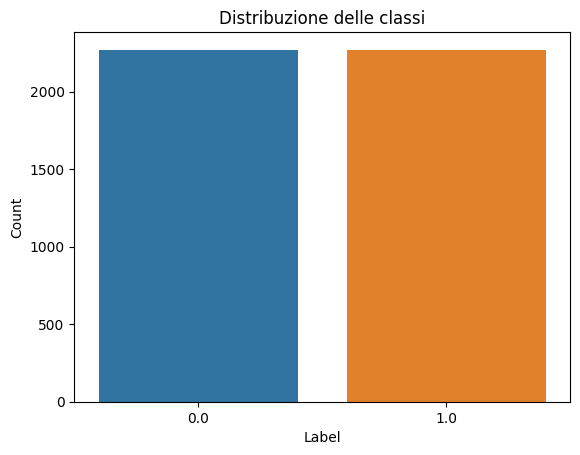

In [ ]:
sns.countplot(data=pca_train_set_resampled, x='Class')
plt.xClass('Class')
plt.yClass('Count')
plt.title('Distribuzione delle classi')
plt.show()

Viene effettuato SMOTE anche sul train set originale:

In [ ]:
X_resampled, y_resampled = SMOTE(k_neighbors=5).fit_resample(train_set_categories.drop('Class', axis=1), train_set_categories.Class)
train_set_categories_resampled = pd.concat([X_resampled, y_resampled.rename('Class')], axis=1)

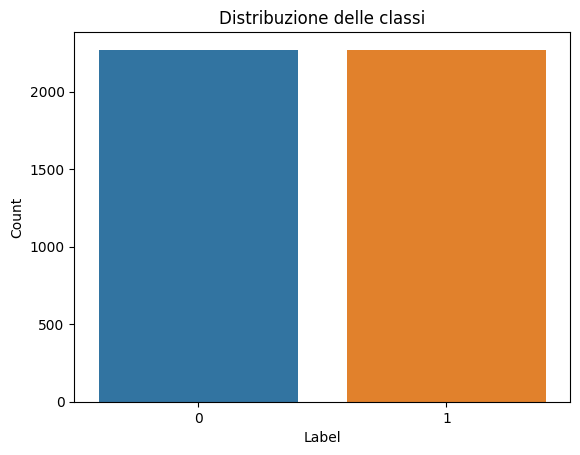

In [ ]:
sns.countplot(data=train_set_categories_resampled, x='Class')
plt.xClass('Class')
plt.yClass('Count')
plt.title('Distribuzione delle classi')
plt.show()

# Futuro

dopo:  Regression, Support Vector Classifier, KNN classifier, 
prima e dopo: Random Forest
Classifier prima e dopo

plot x variabili contare gli 1 in x

contare varianza feature

In [ ]:
testina = df.copy()
testina.columns[testina.nunique(dropna=False) <= 1]

Index([], dtype='object')

In [ ]:
test_set['url*images+buttons'].unique()

array([0], dtype=int64)

In [ ]:
df.to_csv("df.csv", index=False)